In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('../titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
data['pref'] = data['Name'].apply(lambda f: f.split()[0].split('.')[0])
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,pref
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Mr
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Mrs
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Miss
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Mrs
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Mr


In [4]:
data['male'] = pd.get_dummies(data['Sex'], drop_first=True)
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,pref,male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Mr,True
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Mrs,False
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Miss,False
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Mrs,False
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Mr,True


In [5]:
train, test = train_test_split(data.drop(['Sex', 'Name'], axis=1), test_size=0.2, random_state=3)

In [6]:
pref_stat = dict(
    list(train.groupby('pref')['Survived'].agg(['count', 'sum']).reset_index().apply(lambda f: (f['pref'], (f['count'], f['sum'])), axis=1))
)
pref_stat

{'Capt': (1, 0),
 'Col': (2, 1),
 'Dr': (6, 2),
 'Lady': (1, 1),
 'Master': (32, 19),
 'Miss': (140, 95),
 'Mlle': (1, 1),
 'Mme': (1, 1),
 'Mr': (412, 71),
 'Mrs': (105, 83),
 'Ms': (1, 1),
 'Rev': (5, 0),
 'Sir': (1, 1),
 'the': (1, 1)}

In [7]:
train[['Survived', 'pref']].sort_values(by='pref')[:10]

,Survived,pref
741,0,Capt
644,1,Col
691,0,Col
315,0,Dr
762,0,Dr
396,0,Dr
657,1,Dr
244,0,Dr
792,1,Dr
553,1,Lady


In [8]:
train['pref_te'] = train.apply(
    lambda f: 
        (train['Survived'].sum() - f['Survived']) / (train.shape[0] - 1) if pref_stat[f['pref']][0] == 1 
        else (pref_stat[f['pref']][1] - f['Survived']) / (pref_stat[f['pref']][0] - 1), axis=1
)
train.drop(['pref'], inplace=True, axis=1)
display(train.head())
train.info()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,pref_te
287,1,3,22.0,0,0,7.7500,False,0.676259
543,1,2,19.0,1,0,26.0000,False,0.788462
633,0,3,32.0,0,0,7.9250,True,0.172749
469,1,2,33.0,1,2,27.7500,False,0.788462
347,0,3,42.0,0,0,8.6625,True,0.172749


<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 287 to 874
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 709 non-null    int64  
 1   Pclass                   709 non-null    int64  
 2   Age                      709 non-null    float64
 3   Siblings/Spouses Aboard  709 non-null    int64  
 4   Parents/Children Aboard  709 non-null    int64  
 5   Fare                     709 non-null    float64
 6   male                     709 non-null    bool   
 7   pref_te                  709 non-null    float64
dtypes: bool(1), float64(3), int64(4)
memory usage: 45.0 KB


In [9]:
train.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,pref_te
Survived,1.000000,-0.365429,-0.060040,-0.023218,0.075649,0.260017,-0.519485,0.525424
Pclass,-0.365429,1.000000,-0.380183,0.070820,0.019862,-0.542794,0.148827,-0.127145
Age,-0.060040,-0.380183,1.000000,-0.286592,-0.166982,0.102129,0.070505,-0.151477
Siblings/Spouses Aboard,-0.023218,0.070820,-0.286592,1.000000,0.404234,0.150567,-0.116797,0.239235
Parents/Children Aboard,0.075649,0.019862,-0.166982,0.404234,1.000000,0.206565,-0.249032,0.359770
Fare,0.260017,-0.542794,0.102129,0.150567,0.206565,1.000000,-0.179254,0.180334
male,-0.519485,0.148827,0.070505,-0.116797,-0.249032,-0.179254,1.000000,-0.918070
pref_te,0.525424,-0.127145,-0.151477,0.239235,0.359770,0.180334,-0.918070,1.000000


In [10]:
test['pref_te'] = test.apply(
    lambda f: 
        train['Survived'].mean() if pd.isna(pref_stat.get(f['pref']))
        else (pref_stat[f['pref']][1]) / (pref_stat[f['pref']][0])
        , axis=1
)
test.drop(['pref'], inplace=True, axis=1)
display(test.head())
test.info()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,pref_te
729,0,2,23.0,0,0,13.0000,True,0.17233
91,0,1,46.0,1,0,61.1750,True,0.17233
157,0,3,37.0,0,0,8.6625,True,0.17233
388,1,1,36.0,1,2,120.0000,True,0.17233
610,0,3,22.0,0,0,7.7500,True,0.17233


<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 729 to 652
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 178 non-null    int64  
 1   Pclass                   178 non-null    int64  
 2   Age                      178 non-null    float64
 3   Siblings/Spouses Aboard  178 non-null    int64  
 4   Parents/Children Aboard  178 non-null    int64  
 5   Fare                     178 non-null    float64
 6   male                     178 non-null    bool   
 7   pref_te                  178 non-null    float64
dtypes: bool(1), float64(3), int64(4)
memory usage: 11.3 KB


In [11]:
features_train_1 = train.drop(['Survived', 'pref_te'], axis=1)
features_train_2 = train.drop(['Survived'], axis=1)
target_train = train['Survived']

features_test_1 = test.drop(['Survived', 'pref_te'], axis=1)
features_test_2 = test.drop(['Survived'], axis=1)
target_test = test['Survived']

In [12]:
model = DecisionTreeClassifier(max_depth=2)

model.fit(features_train_1, target_train)
print(f'ROC AUC SCORE: {roc_auc_score(target_test, model.predict_proba(features_test_1)[:, 1])}')

ROC AUC SCORE: 0.8390742001361471


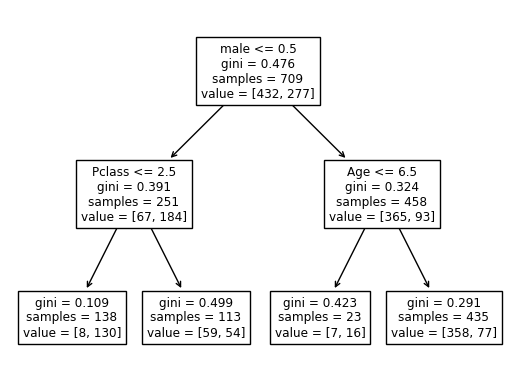

In [13]:
# выводим дерево
plot_tree(model, feature_names=list(features_train_1.columns));

In [14]:
model = DecisionTreeClassifier(max_depth=2)

model.fit(features_train_2, target_train)
print(f'ROC AUC SCORE: {roc_auc_score(target_test, model.predict_proba(features_test_2)[:, 1])}')

ROC AUC SCORE: 0.8570456092579987


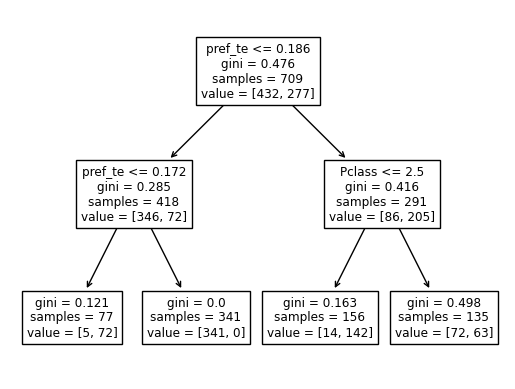

In [15]:
# выводим дерево
plot_tree(model, feature_names=list(features_train_2.columns));

In [30]:
model = RandomForestClassifier(max_depth=5, n_estimators=20)

model.fit(features_train_2, target_train)
preds = model.predict_proba(features_test_2)[:, 1]
print(f'ROC AUC SCORE: {roc_auc_score(target_test, preds)}')

ROC AUC SCORE: 0.8871341048332199


In [35]:
target_test

729    0
91     0
157    0
388    1
610    0
      ..
465    0
356    1
146    0
801    0
652    0
Name: Survived, Length: 178, dtype: int64

In [41]:
naob = (1. * ~(target_test == 1)).apply(lambda f: int(f))
roc_auc_score(naob, preds)

0.11286589516678011

In [42]:
(1. * ~(target_test == 1)).astype(int)

729    1
91     1
157    1
388    0
610    1
      ..
465    1
356    0
146    1
801    1
652    1
Name: Survived, Length: 178, dtype: int64

In [18]:
threshold

array([       inf, 0.97249876, 0.95882804, 0.93011513, 0.92941663,
       0.83766101, 0.82165736, 0.80074327, 0.793031  , 0.76721857,
       0.760039  , 0.75949949, 0.75169412, 0.74081846, 0.73470687,
       0.72263962, 0.72009647, 0.6970389 , 0.64319818, 0.63963459,
       0.6354791 , 0.61580595, 0.60462657, 0.54826899, 0.46795378,
       0.45210033, 0.39299952, 0.36169169, 0.34445256, 0.21305797,
       0.20679291, 0.18255669, 0.17507131, 0.15700667, 0.14265534,
       0.14087764, 0.14045504, 0.12338647, 0.12171437, 0.11930546,
       0.10388026, 0.10241613, 0.08094749, 0.07843824, 0.05079365,
       0.03635296, 0.0349664 , 0.03462882, 0.03137665, 0.02922106,
       0.02917338, 0.02783079, 0.02758103, 0.02744925, 0.02610665,
       0.02585689, 0.02563131, 0.01699063, 0.0167628 , 0.00958322])

In [19]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00884956, 0.00884956, 0.01769912, 0.01769912,
       0.01769912, 0.02654867, 0.02654867, 0.03539823, 0.03539823,
       0.03539823, 0.05309735, 0.05309735, 0.07964602, 0.07964602,
       0.08849558, 0.08849558, 0.09734513, 0.09734513, 0.13274336,
       0.14159292, 0.15929204, 0.17699115, 0.17699115, 0.2300885 ,
       0.2300885 , 0.24778761, 0.24778761, 0.27433628, 0.2920354 ,
       0.31858407, 0.31858407, 0.32743363, 0.34513274, 0.34513274,
       0.38053097, 0.40707965, 0.50442478, 0.52212389, 0.56637168,
       0.62831858, 0.63716814, 0.65486726, 0.67256637, 0.7079646 ,
       0.78761062, 0.80530973, 0.82300885, 0.85840708, 0.86725664,
       0.88495575, 0.89380531, 0.92920354, 0.95575221, 1.        ])

In [20]:
tpr

array([0.        , 0.01538462, 0.04615385, 0.18461538, 0.21538462,
       0.41538462, 0.41538462, 0.49230769, 0.49230769, 0.53846154,
       0.58461538, 0.6       , 0.63076923, 0.63076923, 0.64615385,
       0.67692308, 0.67692308, 0.72307692, 0.72307692, 0.73846154,
       0.73846154, 0.76923077, 0.76923077, 0.8       , 0.8       ,
       0.81538462, 0.81538462, 0.83076923, 0.84615385, 0.84615385,
       0.86153846, 0.86153846, 0.87692308, 0.87692308, 0.87692308,
       0.89230769, 0.90769231, 0.90769231, 0.90769231, 0.92307692,
       0.92307692, 0.92307692, 0.92307692, 0.92307692, 0.92307692,
       0.92307692, 0.92307692, 0.92307692, 0.92307692, 0.92307692,
       0.93846154, 0.93846154, 0.93846154, 0.95384615, 0.95384615,
       0.95384615, 0.95384615, 0.95384615, 0.95384615, 1.        ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


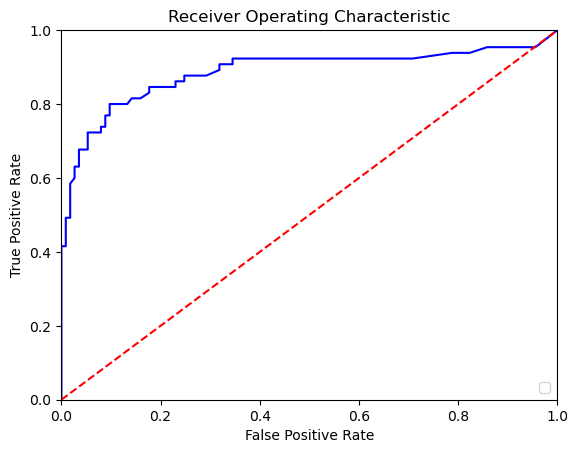

In [17]:
fpr, tpr, threshold = roc_curve(target_test, preds)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
predicts_and_labels = pd.DataFrame(
    zip(target_test, model.predict_proba(features_test_2)[:, 1]), 
    columns=['label', 'predict']
)
predicts_and_labels.head(10)

,label,predict
0,0,0.102416
1,0,0.182557
2,0,0.029173
3,1,0.206793
4,0,0.034629
5,0,0.100490
6,0,0.070334
7,0,0.029173
8,0,0.467954
9,0,0.095554


In [22]:
predicts_and_labels.sort_values('predict', ascending=False, inplace=True)
predicts_and_labels.reset_index(drop=True, inplace=True)
predicts_and_labels.head(40)

,label,predict
0,1,0.972499
1,1,0.958828
2,1,0.958828
3,1,0.957495
4,1,0.956150
5,1,0.951113
6,1,0.948478
7,1,0.944276
8,1,0.942551
9,1,0.942129


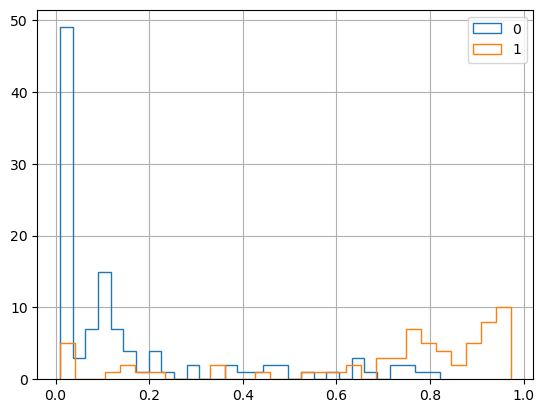

In [23]:
predicts_and_labels.query('label==0')['predict'].hist(bins=30, histtype='step', label=0)
predicts_and_labels.query('label==1')['predict'].hist(bins=30, histtype='step', label=1)
plt.legend();

In [24]:
predicts_and_labels['ones_accum'] = predicts_and_labels['label'].cumsum() / target_test.value_counts()[0]
predicts_and_labels['zeros_accum'] = abs(1 - predicts_and_labels['label']).cumsum() / target_test.value_counts()[1]
predicts_and_labels.head(40)

,label,predict,ones_accum,zeros_accum
0,1,0.972499,0.008850,0.000000
1,1,0.958828,0.017699,0.000000
2,1,0.958828,0.026549,0.000000
3,1,0.957495,0.035398,0.000000
4,1,0.956150,0.044248,0.000000
5,1,0.951113,0.053097,0.000000
6,1,0.948478,0.061947,0.000000
7,1,0.944276,0.070796,0.000000
8,1,0.942551,0.079646,0.000000
9,1,0.942129,0.088496,0.000000


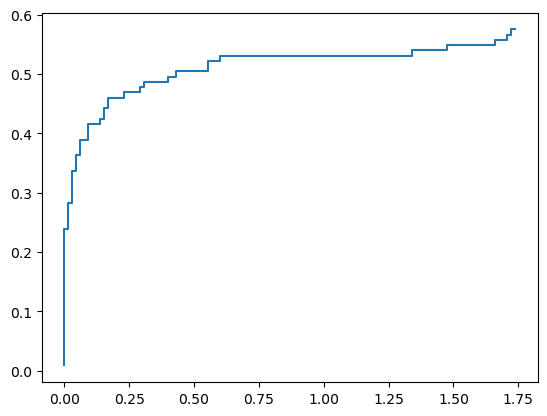

In [25]:
plt.plot(
    predicts_and_labels['zeros_accum'],
    predicts_and_labels['ones_accum']
)

0.096

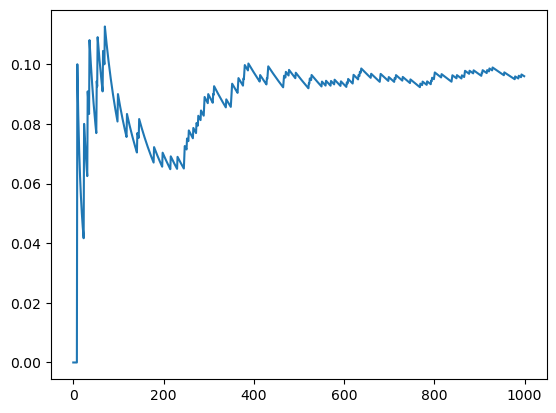

In [29]:
sum_total = 0
score_accum = []
n_tries = 1000
for i in range(n_tries):
    zero_score = predicts_and_labels.query('label == 0').sample(1)['predict'].values[0]
    one_score = predicts_and_labels.query('label == 1').sample(1)['predict'].values[0]
    sum_total += (zero_score < one_score)
    score_accum.append(sum_total / (i + 1))
plt.plot(score_accum)
sum_total / n_tries